In [33]:
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import math

In [34]:
train = pd.read_csv("Final_project_DATA/df_train.csv")
test = pd.read_csv("Final_project_DATA/df_test.csv")

In [35]:
X_train = train.drop('type', axis = 1)
y_train = train['type']
X_test = test.drop('type',axis = 1)
y_test = test['type']

In [36]:
scaler = preprocessing.MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
X_train

array([[0.98986916, 0.73935558, 0.92211055, ..., 0.53613342, 0.        ,
        0.94594595],
       [0.99144681, 0.79286536, 0.57286432, ..., 0.60840025, 0.        ,
        0.45945946],
       [0.98901514, 0.78941312, 0.92462312, ..., 0.4867202 , 0.        ,
        0.        ],
       ...,
       [0.99329826, 0.90851554, 0.45979899, ..., 0.53180976, 0.53333333,
        0.        ],
       [0.98812201, 0.73187572, 0.86934673, ..., 0.49969117, 0.        ,
        0.64864865],
       [0.98952364, 0.73245109, 0.86180905, ..., 0.54107474, 0.        ,
        0.81081081]])

## Dim reduction PCA

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X_train)

from sklearn.decomposition import PCA
pca_test = PCA(n_components = 2)
x_pca_test = pca_test.fit_transform(X_test)

In [82]:
x_pca

array([[-4.03262270e-01,  7.11277150e-01],
       [ 3.22364068e-02,  3.07193997e-01],
       [-1.88750699e-01, -2.21316482e-01],
       [ 6.32644124e-01,  7.11871795e-03],
       [-2.74507860e-01, -2.09866225e-01],
       [-1.77427080e-01, -2.13473645e-01],
       [-2.52384099e-01,  4.44523272e-01],
       [ 2.44635668e-01, -1.20326672e-01],
       [-1.87445840e-01, -2.14801952e-01],
       [ 7.73838216e-01,  1.73305017e-01],
       [-2.76771525e-01,  2.93186436e-01],
       [-2.38357600e-01,  2.99667836e-01],
       [ 9.01902413e-01,  3.63332645e-04],
       [-2.78742591e-01, -2.07817418e-01],
       [-1.87903695e-01, -2.05593992e-01],
       [-1.94996904e-02, -1.69625669e-01],
       [ 6.09243663e-02, -1.87014264e-01],
       [-1.48688885e-01, -2.12311426e-01],
       [-1.81367830e-01, -2.12314957e-01],
       [-2.37485083e-01, -2.18245910e-01],
       [-1.36453293e-01, -2.13949774e-01],
       [ 7.54371109e-01, -2.95717346e-02],
       [ 7.70139981e-01, -3.11020193e-02],
       [ 1.

In [83]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.54544521 0.24929576]


In [84]:
print(int(math.sqrt(len(train))))

12


In [186]:
# train point 
k=int(math.sqrt(len(train)))
knn_clf=KNeighborsClassifier(n_neighbors = 7)
knn_clf.fit(x_pca,y_train)
y_pred=knn_clf.predict(x_pca_test) #These are the predicted output values7

In [187]:
y_pred

array([1, 1, 1, 2, 1, 7, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 2, 7, 2, 5,
       1, 2, 1, 5, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 2, 2, 1, 1, 1, 1, 7, 1,
       2, 1, 2, 1, 7, 1, 2, 1, 1, 1, 1, 5, 1, 2, 1, 7, 1, 2, 1, 1, 1],
      dtype=int64)

In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(conf_matrix)
rep = classification_report(y_test, y_pred)
print('Classification Report:',)
print (rep)
acc = accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

Confusion Matrix: 
[[20  1  0  0  0  0]
 [14  7  0  2  0  0]
 [ 5  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 2  0  0  0  0  1]
 [ 0  2  0  2  0  5]]
Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.95      0.65        21
           2       0.50      0.30      0.38        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.83      0.56      0.67         9

    accuracy                           0.49        65
   macro avg       0.30      0.30      0.28        65
weighted avg       0.45      0.49      0.43        65

Accuracy: 0.49230769230769234


D:\flavi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plots

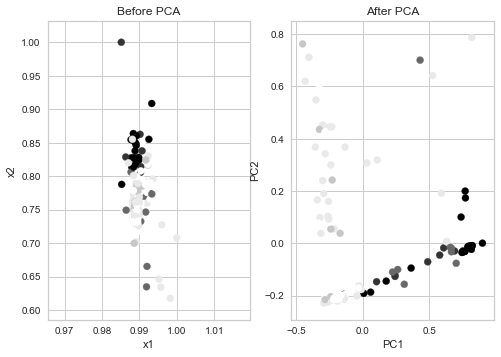

In [189]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_pca[:,0], x_pca[:,1], c=y_train)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

## Decision Boundary Plots

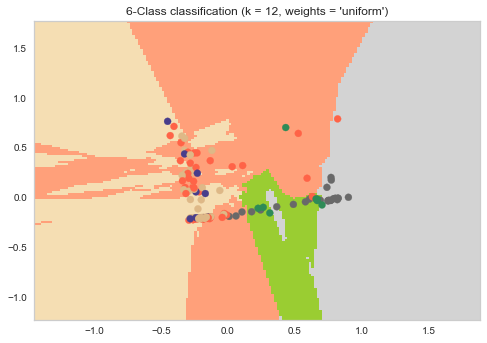

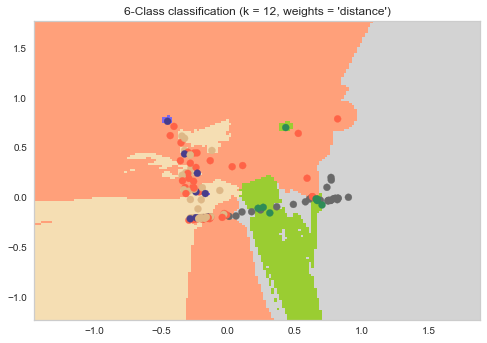

In [190]:
import matplotlib.pyplot as plt
y =  train['type']
n_neighbors = k 
h = .02  # step size in the mesh
X=x_pca

# Create color maps
cmap_light = ListedColormap(['wheat', 'lightsalmon', 'mediumslateblue','paleturquoise','yellowgreen','lightgrey'])
cmap_bold = ListedColormap(['burlywood', 'tomato', 'darkslateblue','darkturquoise','seagreen','dimgray'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("6-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()